In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
%matplotlib inline

In [2]:
data = pd.read_csv('usgs_earthquakes.csv')
data.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
5,2014-01-31 23:30:36.930,32.567667,-117.0135,0.01,1.51,ml,16.0,264.00,0.080810,0.2100,ci,ci11419722,2014-02-01T00:09:04.470Z,"3km N of Tijuana, Mexico",quarry blast
6,2014-01-31 23:28:04.020,33.359000,-116.3605,12.98,1.17,ml,26.0,163.00,0.032660,0.1200,ci,ci11419714,2014-02-01T00:54:07.630Z,"11km N of Borrego Springs, California",earthquake
7,2014-01-31 23:22:52.000,62.800200,-150.6965,86.40,1.50,ml,NaN,NaN,NaN,0.4700,ak,ak11151127,2014-01-31T23:33:23.190Z,"61km NNW of Talkeetna, Alaska",earthquake
8,2014-01-31 23:20:42.000,58.169500,-151.9924,50.10,2.10,ml,NaN,NaN,NaN,0.3700,ak,ak11151125,2014-01-31T23:25:57.118Z,"48km NNE of Kodiak, Alaska",earthquake
9,2014-01-31 23:17:34.300,37.686000,-121.7287,4.20,1.60,Md,NaN,111.60,0.062882,0.0700,nc,nc72153361,2014-02-11T22:43:08.085Z,"3km E of Livermore, California",earthquake


In [3]:
top_50_earthquakes = data.sort_values(by='mag', ascending=False).head(50)
top_50_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

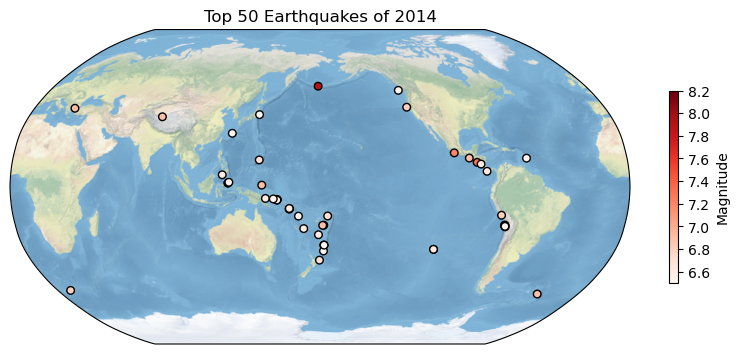

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
sc = ax.scatter(
    top_50_earthquakes['longitude'],
    top_50_earthquakes['latitude'],
    transform=ccrs.PlateCarree(),  
    c=top_50_earthquakes['mag'],  
    cmap='Reds',  
    s=30, 
    edgecolors = 'black'
)
fig.colorbar(sc, ax=ax, location='right', anchor=(0, 0.5), shrink=0.5,label='Magnitude',ticks =[8.2,8.0,7.8,7.6,7.4,7.2,7.0,6.8,6.6])
ax.set_title('Top 50 Earthquakes of 2014')

I got inspired by reading：
https://matplotlib.org/stable/users/explain/colors/colormaps.html#sphx-glr-users-explain-colors-colormaps-py
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/global_map.html#sphx-glr-gallery-lines-and-polygons-global-map-py

# 2 Explore a netCDF dataset

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [8]:
ds = xr.open_dataset('precip.nc')
ds_rain = ds.Rainf_f_tavg*60*60*24*30

In [9]:
precip_mean = ds_rain.groupby('time.year').sum().mean('year')

Text(-170, -20, 'rainfall flux\n showed obvious \nspatial aggregation')

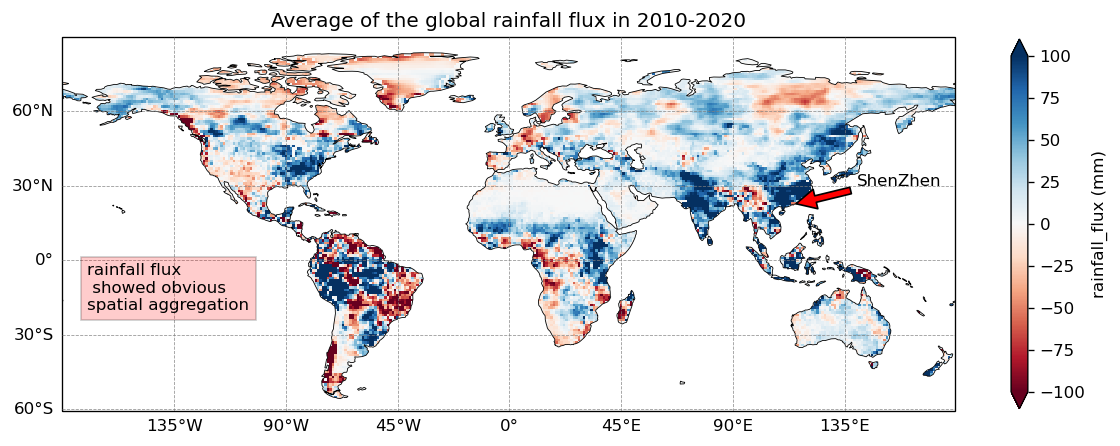

In [10]:
fig = plt.figure(figsize=(12,8), dpi=120)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.5, color='gray', alpha=0.8, zorder=3,linestyle='--')
gl.ylocator = mticker.FixedLocator(np.arange(-60,91,30))
gl.xlocator = mticker.FixedLocator([-135,-90, -45, 0, 45, 90,135])
gl.top_labels = False
gl.right_labels = False
sc = precip_mean.plot(ax = ax,vmax=100,vmin= -100 ,transform=ccrs.PlateCarree(),cmap='RdBu',add_colorbar=False,zorder=1)
cb = fig.colorbar(sc, ax=ax, location='right', anchor=(0, 0.5), extend ='both' , shrink=0.5,label='rainfall_flux (mm)')
ax.add_feature(cfeature.OCEAN,  edgecolor='black', facecolor='white',linewidths=0.5,zorder=2)
ax.set_title('Average of the global rainfall flux in 2010-2020')
ax.annotate('ShenZhen', xy=(114.1, 22.5), xycoords='data', xytext=(140, 30),arrowprops=dict(facecolor='red', shrink=0.05))
ax.text(-170, -20, "rainfall flux\n showed obvious \nspatial aggregation", color='black',bbox=dict(facecolor='red', alpha=0.2))

I got inspired by reading:
https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate

2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

Text(130, 20, 'rainfall flux\n showed obvious \nspatial aggregation')

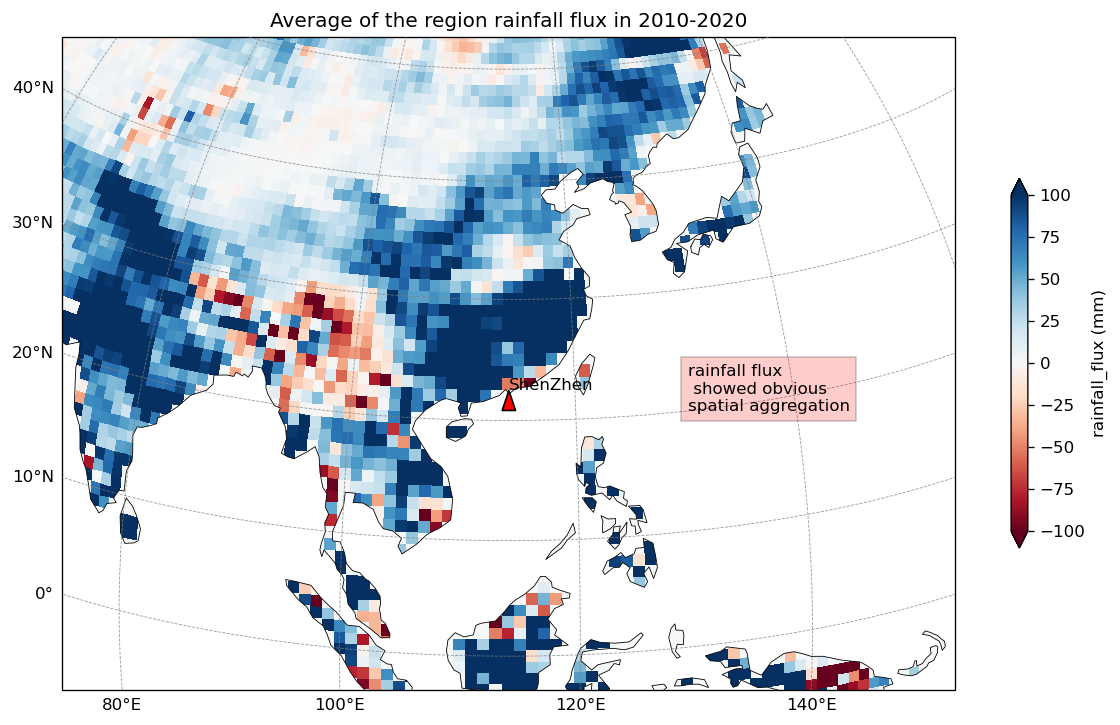

In [11]:
fig = plt.figure(figsize=(12,8), dpi=120)
central_lon, central_lat = 114.1, 22.5
proj = ccrs.Orthographic(central_lon, central_lat)
ax = plt.axes(projection=proj)
extent = [central_lon-40, central_lon+40, central_lat-25, central_lat+25]
ax.set_extent(extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.5, color='gray', alpha=0.8, zorder=3,linestyle='--')
gl.top_labels = False
gl.right_labels = False
sc = precip_mean.plot(ax = ax,vmax=100,vmin= -100 ,transform=ccrs.PlateCarree(),cmap='RdBu',add_colorbar=False,zorder=1)
cb = fig.colorbar(sc, ax=ax, location='right', anchor=(0, 0.5), extend ='both' , shrink=0.5,label='rainfall_flux (mm)')
ax.add_feature(cfeature.OCEAN,  edgecolor='black', facecolor='white',linewidths=0.5,zorder=2)
ax.set_title('Average of the region rainfall flux in 2010-2020')
ax.annotate('ShenZhen', xy=(114.1, 22.5),  xytext=(120, 30),arrowprops=dict(facecolor='red', shrink=0.1,width=1, headwidth=8),transform=ccrs.PlateCarree(),zorder=4)
ax.text(130, 20, "rainfall flux\n showed obvious \nspatial aggregation", color='black',bbox=dict(facecolor='red', alpha=0.2),transform=ccrs.PlateCarree())